In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from statsmodels.stats.multitest import multipletests

import sys
sys.path.insert(0, "/Users/lili/dropbox_lili/outliers_package/blackSheep/")
import blacksheep as deva
sns.set(font = 'arial', style = 'white', color_codes=True, font_scale = 1.3)

# Reading in data

In [9]:
values = deva.read_in_values('brca/rna_common_samples_data.csv')

In [3]:
values.loc[values.index.duplicated()]

,TCGA-AO-A12D,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,TCGA-A2-A0EX,TCGA-AN-A04A,TCGA-BH-A0AV,TCGA-C8-A12T,...,TCGA-BH-A0DD,TCGA-BH-A0E9,TCGA-AR-A0TT,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,


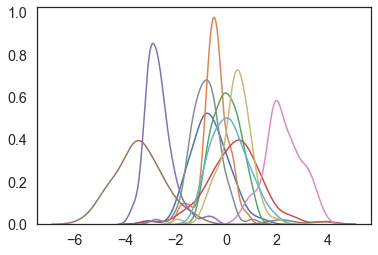

In [4]:
for i in range(0, 10):
    sns.distplot(values.sample().dropna(), hist=False)

In [5]:
annotations = deva.read_in_values('brca/annotations_common_samples.csv')

In [6]:
annotations.iloc[0:10, 0:10]

,Sample ID,Biospecimen Barcode Side,UIUD,PAM50,ER Status,PR Status,HER2 Status,QC Status,Proteome Cluster (see Fig. 3b),Phosphoproteome Cluster (see Fig. 3b)
TCGA-AO-A12D,AO-A12D,TCGA-AO-A12D-01A-41-A21V-30,1DC52613-0C9C-4107-A800-6CF8A5DBC1D7,Her2,Negative,Negative,Positive,pass,1.0,1.0
TCGA-BH-A18Q,BH-A18Q,TCGA-BH-A18Q-01A-41-A21W-30,5188E257-2542-42DE-AB8F-D1011AA35509,Basal,Negative,Negative,Negative,pass,1.0,3.0
TCGA-C8-A130,C8-A130,TCGA-C8-A130-01A-41-A21V-30,28E062F4-E9E6-468B-BF72-BA973B111CCB,Her2,Positive,Positive,Equivocal,pass,2.0,1.0
TCGA-C8-A138,C8-A138,TCGA-C8-A138-01A-14-A21W-30,035ADBBA-464A-4569-9E07-8B6A6BD12407,Her2,Positive,Negative,Positive,pass,2.0,2.0
TCGA-E2-A154,E2-A154,TCGA-E2-A154-01A-41-A21V-30,7DC5DC2F-EE63-4A02-BF6D-950B8A913082,LumA,Positive,Positive,Negative,pass,3.0,3.0
TCGA-C8-A12L,C8-A12L,TCGA-C8-A12L-01A-41-A21V-30,44DAA2B1-5B90-4430-8466-648EBBAAB29F,Her2,Negative,Negative,Positive,pass,1.0,1.0
TCGA-A2-A0EX,A2-A0EX,TCGA-A2-A0EX-01A-41-A21V-30,78271500-147B-40C5-B789-0CF0C7CDBCE2,LumA,Positive,Positive,Negative,pass,3.0,3.0
TCGA-AN-A04A,AN-A04A,TCGA-AN-A04A-01A-31-A21W-30,8ED12A60-C75C-4805-813C-6510554BC9DA,LumA,Positive,Positive,Negative,pass,2.0,1.0
TCGA-BH-A0AV,BH-A0AV,TCGA-BH-A0AV-01A-32-A21V-30,15F6637A-B3FD-4827-9D26-C50B7B4DDE21,Basal,Negative,Negative,Negative,pass,3.0,3.0
TCGA-C8-A12T,C8-A12T,TCGA-C8-A12T-01A-41-A21V-30,E8B7EC10-4F67-41F5-A418-0EF440C0A626,Her2,Positive,Positive,Positive,pass,2.0,2.0


# Isolating which samples annotations for which I want to perform comparisons

In [17]:
for col in ['GATA3 Mutation','PIK3CA Mutation','TP53 Mutation']:
    new_col = '.'.join(col.split()+['Status'])
    annotations[new_col] = annotations[col].isnull()==False

annotations = deva.binarize_annotations(annotations[[
    'PAM50', 
]])

# Performing differential outlier analysis for each annotation column

In [18]:
directions = ['up', 'down']

In [19]:
results = {}
for updown in directions:
    results[updown] = deva.deva(
        values, annotations,
        aggregate=False,
#         save_outlier_table=True, 
#         save_frac_table=True, 
#         save_qvalues=True,
        up_or_down=updown, 
#         save_comparison_summaries=True, 
        output_prefix="output/no_agg/brca.rna",
    )

10/18/2019 14:48:32:WARNING:No rows tested for fisherFDR_PAM50_Her2_not-Her2
10/18/2019 14:48:36:WARNING:No rows tested for fisherFDR_PAM50_Basal_not-Basal
10/18/2019 14:48:36:WARNING:No rows tested for fisherFDR_PAM50_Her2_not-Her2


# Making heatmaps

08/28/2019 15:13:18:WARNING:No significant genes at FDR 0.01 in fisherFDR_PAM50_LumA_not-LumA
08/28/2019 15:13:34:WARNING:No significant genes at FDR 0.01 in fisherFDR_PAM50_LumB_not-LumB


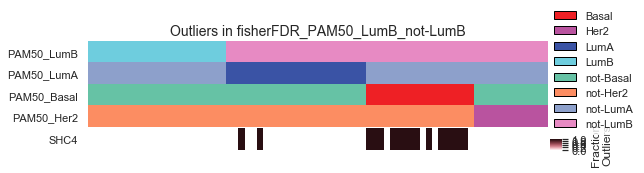

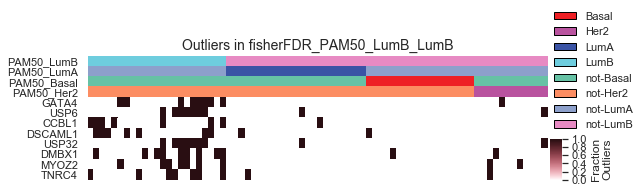

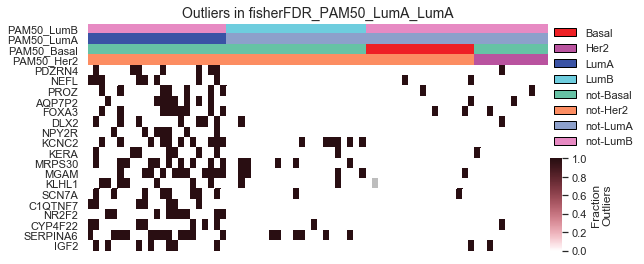

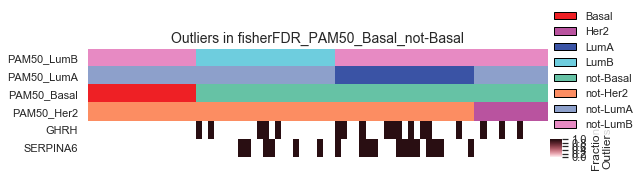

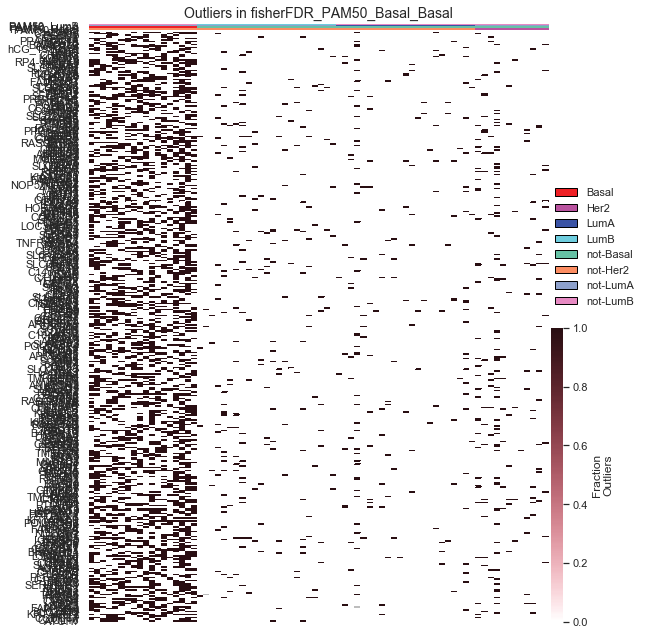

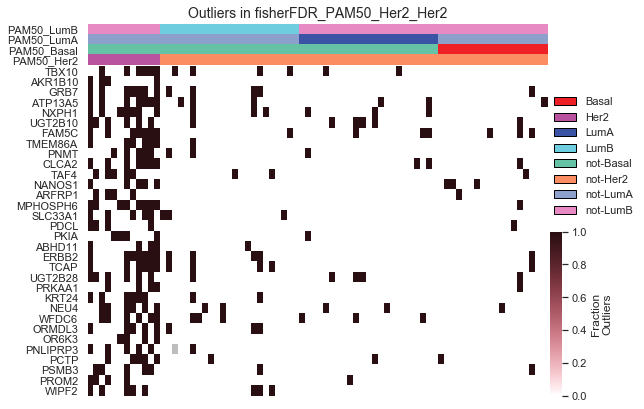

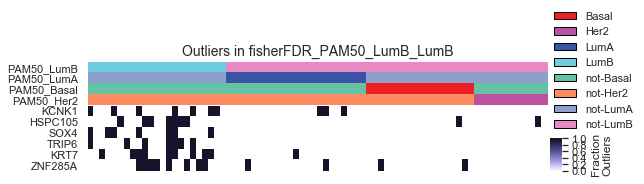

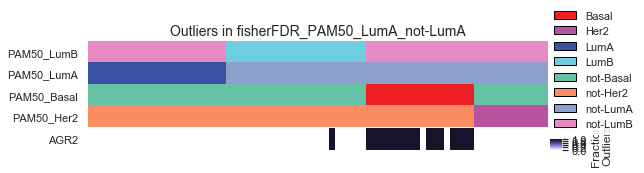

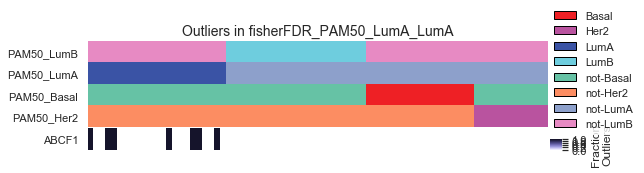

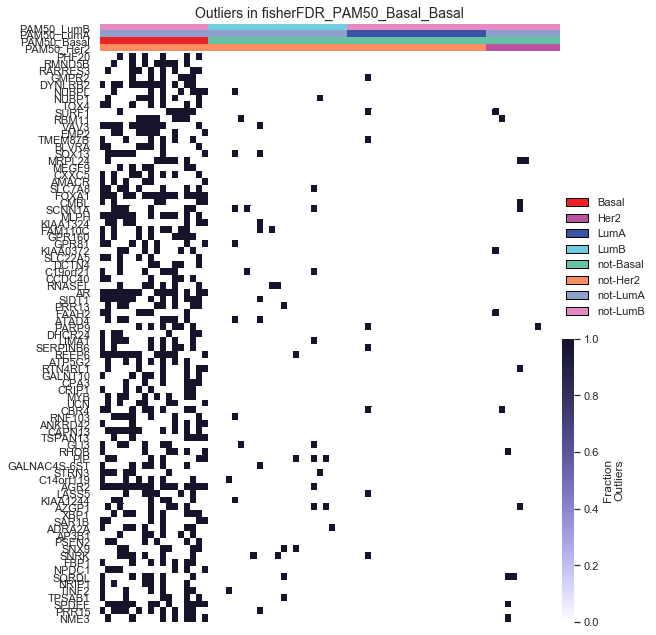

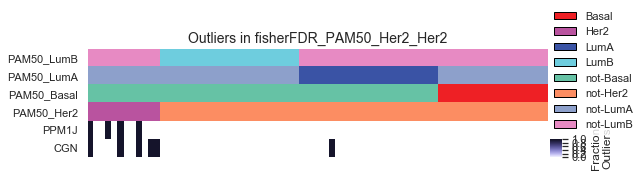

In [16]:
for updown in directions:
    if updown=='up':
        redblue = 'red'
    elif updown == 'down':
        redblue = 'blue'
    
    for col in results[updown][1].df.columns:
        deva.plot_heatmap(
            annotations, 
            results[updown][1].df, 
            col_of_interest=col, 
            vis_table=results[updown][0].frac_table, 
            fdr=0.01, 
            red_or_blue=redblue, 
            output_prefix="output/no_agg/brca.rna.%s"%updown, 
            savefig=True,
            colors='brca/tcga_subtype_colors.txt'
        )
        

# Performing the same comparisons using rank-sum test on raw values

In [50]:
rank_sums = pd.DataFrame()
for comp in annotations.columns:
    group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)
    
    pvals = values.apply((lambda row: scipy.stats.ranksums(row[group0list], row[group1list])[1]), axis=1)
    qvals = multipletests(pvals, method='fdr_bh')[1]
    rank_sums['%s_pval'%(comp)] = pvals
    rank_sums['%s_qval'%(comp)] = qvals
    rank_sums['%s_%s_minus_%s'%(comp, group0, group1)] = values.apply((lambda row: row[group0list].mean() - row[group1list].mean()), axis=1)
    

In [51]:
rank_sums_qs = pd.DataFrame()
for comp in annotations.columns:
    group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)
    rank_sums['%s_logqval'%(comp)] = -np.log10(rank_sums['%s_qval'%(comp)])
    
    rank_sums_qs['%s_%s'%(comp, group0)] = (rank_sums['%s_logqval'%(comp)]*(rank_sums['%s_%s_minus_%s'%(comp, group0, group1)] / rank_sums['%s_%s_minus_%s'%(comp, group0, group1)].abs()))
    

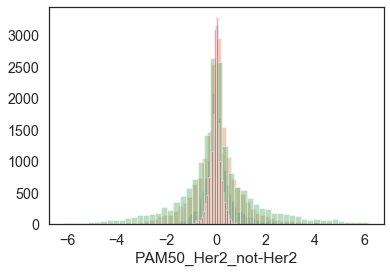

In [52]:
for col in rank_sums_qs.columns:
    sns.distplot(rank_sums_qs[col].dropna(), kde=False)

# Reformatting outliers qvalues to match rank sums

In [53]:
signed_qvalues = {}
dirs = [1, -1]
for i, updown in enumerate(directions):
    df = pd.DataFrame()
    for comp in annotations.columns:
        group0, _, group1, _ = deva.comparisons.get_sample_lists(annotations, comp)
        
        signed_qs = (-np.log10(results[updown][1].df.reindex(['fisherFDR_%s_%s'%(comp, group1)], axis=1)['fisherFDR_%s_%s'%(comp, group1)]).subtract(-np.log10(results[updown][1].df.reindex(['fisherFDR_%s_%s'%(comp, group0)], axis=1)['fisherFDR_%s_%s'%(comp, group0)]), fill_value=0))
        signed_qs = dirs[i]*signed_qs
        
        signed_qs = pd.DataFrame(signed_qs)
        signed_qs.columns = ['%s_%s'%(comp, group0)]
        df = pd.concat([df, signed_qs], join='outer', axis=1)
    signed_qvalues[updown] = df
    

# Comparing with same FDR correction

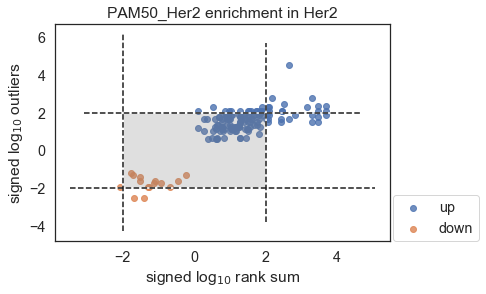

In [64]:
for col in [i for i in rank_sums.columns if ('pval' in i) and ('Her2' in i)]:
    
    comp = col[0:-5]
    group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)
    
    rows = signed_qvalues['up'].dropna(subset=["%s_%s" %(comp, group0)]).index.union(signed_qvalues['down'].dropna(subset=["%s_%s" %(comp, group0)]).index)
    
    adjrank = rank_sums.reindex(rows)[[col]].dropna(how='all', axis=0)
    adjrank['fdr'] = multipletests(adjrank[col], method='fdr_bh')[1]
    adjrank['logqval'] = -np.log10(adjrank['fdr'])
    
    adjrank['%s_%s'%(comp, group0)] = (adjrank['logqval']*(rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)] / rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)].abs()))
    
    for updown in directions:
        if any([g for g in rows if g in signed_qvalues[updown].index]):
            ax = sns.regplot(x=-adjrank.loc[rows, '%s_%s'%(comp, group0)], y=signed_qvalues[updown].loc[rows, '%s_%s'%(comp, group0)], fit_reg=False, label=updown)
    plt.xlabel('signed log$_{10}$ rank sum')
    plt.ylabel('signed log$_{10}$ outliers')
    plt.title('%s enrichment in %s' %(comp, group1))
    plt.legend(loc=(1.01,0))
    plt.plot([2, 2], ax.get_ylim(), 'white')
    plt.plot( ax.get_xlim(), [2, 2],'white')
    plt.plot([-2, -2], ax.get_ylim(), 'white')
    plt.plot( ax.get_xlim(), [-2, -2],'white')
    
    plt.plot([2, 2], ax.get_ylim(), 'k--')
    plt.plot( ax.get_xlim(), [2, 2],'k--')
    plt.plot([-2, -2], ax.get_ylim(), 'k--')
    plt.plot( ax.get_xlim(), [-2, -2],'k--')
    rect = mpl.patches.Rectangle([-2, -2], 4, 4, facecolor='gray', ec=None, alpha=0.25)
    ax.add_patch(rect)
    plt.savefig('output/scatter_rna_logqs_%s.pdf'%(comp), bbox_inches='tight')
    plt.show()
    plt.close()

# Comparing results for Her2 comparison

In [55]:
col = 'PAM50_Her2_pval'
comp = col[0:-5]
group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)

rows = signed_qvalues['up'].dropna(subset=["%s_%s" %(comp, group0)]).index.union(signed_qvalues['down'].dropna(subset=["%s_%s" %(comp, group0)]).index)

adjrank = rank_sums.reindex(rows)[[col]]
adjrank['fdr'] = multipletests(adjrank[col])[1]
adjrank['logqval'] = -np.log10(adjrank['fdr'])

adjrank['%s_%s'%(comp, group0)] = (adjrank['logqval']*(rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)] / rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)].abs()))

outliersqs = pd.DataFrame()
for updown in directions:
    outliersqs[updown] = signed_qvalues[updown].loc[rows, '%s_%s'%(comp, group0)]


In [56]:
((outliersqs['up'].isnull()==False) & (outliersqs['down'].isnull()==False)).sum()

0

In [57]:
adjrank['outliers'] = outliersqs['up'].add(outliersqs['down'], fill_value=0)

fdr = 2

ranksigonly =  adjrank.loc[((adjrank['outliers'].abs()<fdr)&
                             (adjrank['PAM50_Her2_not-Her2'].abs()>2)), :].sort_values('PAM50_Her2_not-Her2').index

outliersigonly =  adjrank.loc[((adjrank['outliers'].abs()>fdr)&
                             (adjrank['PAM50_Her2_not-Her2'].abs()<2)), :].sort_values('outliers').index

adjrank['outliers'] = outliersqs['up'].add(outliersqs['down'], fill_value=0)

fdr = 2

ranksigonly =  adjrank.loc[((adjrank['outliers'].abs()<fdr)&
                             (adjrank['PAM50_Her2_not-Her2'].abs()>fdr)), :].sort_values('PAM50_Her2_not-Her2').index

outliersigonly =  adjrank.loc[((adjrank['outliers'].abs()>fdr)&
                             (adjrank['PAM50_Her2_not-Her2'].abs()<fdr)), :].sort_values('outliers').index

commonsig =  adjrank.loc[((adjrank['outliers'].abs()>fdr)&
                             (adjrank['PAM50_Her2_not-Her2'].abs()>fdr)), :].sort_values('outliers').index

#### Visualizing

In [60]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap.set_bad('#BDBDBD')
cmap.set_over('#9E031A')
cmap.set_under('#0C4A60')


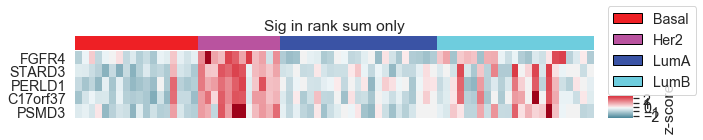

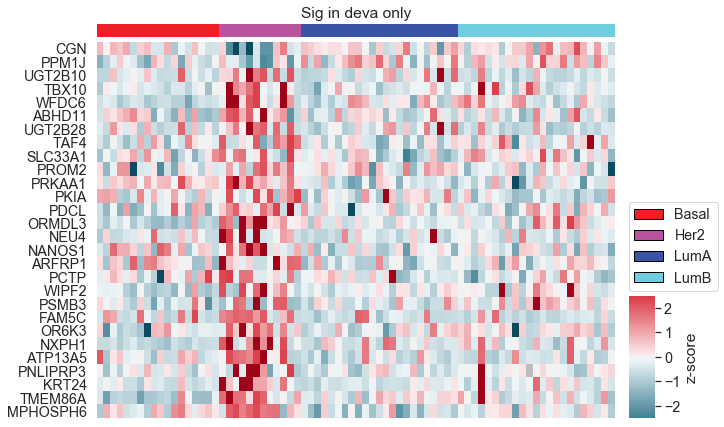

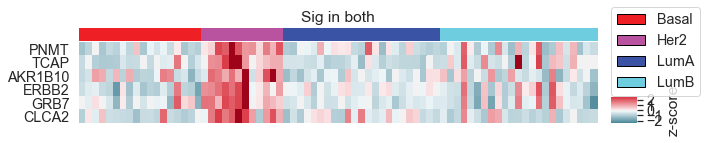

In [65]:
header = deva.read_in_values('brca/annotations_common_samples.csv').sort_values('PAM50')
with open('brca/tcga_subtype_colors.txt', 'r') as fh:
    colors = {i.split()[0]: i.split()[1] for i in fh.readlines()}
labs = ['Sig in rank sum only', 'Sig in deva only', 'Sig in both']
for i, sig_genes in enumerate([ranksigonly, outliersigonly, commonsig]):
    fig = plt.figure(figsize=(10, 0.25*(1+len(sig_genes))))
    gs = plt.GridSpec(nrows=4, ncols=2, height_ratios=[1] +3*[len(sig_genes)/3], width_ratios=[20, 1], hspace=0.05, wspace=0.05)

    annotax = plt.subplot(gs[0, 0])
    heatax = plt.subplot(gs[1:, 0])
    cbarax = plt.subplot(gs[-1, 1])
    leg_ax = plt.subplot(gs[-2, 1])
    leg_ax.axis('off')

    deva.catheat.heatmap(header[['PAM50']].transpose(), 
                         ax=annotax, cmap=colors, 
                         leg_ax=leg_ax, 
                         leg_kws=dict(loc=(0, 0)), 
                         xticklabels=False)
    annotax.set_yticklabels(['PAM50'], rotation=0)
    annotax.set_title(labs[i])
    
    temp = values.loc[sig_genes, header.index]
    mean = temp.mean(axis=1)
    stdev = temp.std(axis=1)
    temp = temp.subtract(mean, axis=0).divide(stdev, axis=0)
    sns.heatmap(temp, 
                ax=heatax, cbar_ax=cbarax, cmap=cmap,
                xticklabels=False, 
                yticklabels=sig_genes,
                vmin=-2.5, vmax=2.5,
#                 center=0,
                cbar_kws=dict(label='z-score')
               )
    
    plt.savefig('output/heatmap_rna_her2_%s.pdf' % "".join(labs[i].split()), bbox_inches='tight', dpi=500)

# Same for basal

In [99]:
col = 'PAM50_Basal_pval'
comp = col[0:-5]
group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)

rows = signed_qvalues['up'].dropna(subset=["%s_%s" %(comp, group0)]).index.union(signed_qvalues['down'].dropna(subset=["%s_%s" %(comp, group0)]).index)

adjrank = rank_sums.reindex(rows)[[col]]
adjrank['fdr'] = multipletests(adjrank[col])[1]
adjrank['logqval'] = -np.log10(adjrank['fdr'])

adjrank['%s_%s'%(comp, group0)] = (adjrank['logqval']*(rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)] / rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)].abs()))

outliersqs = pd.DataFrame()
for updown in directions:
    outliersqs[updown] = signed_qvalues[updown].loc[rows, '%s_%s'%(comp, group0)]


/Users/lili/anaconda3/envs/blacksheep/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [100]:
((outliersqs['up'].isnull()==False) & (outliersqs['down'].isnull()==False)).sum()

0

In [107]:
adjrank['outliers'] = outliersqs['up'].add(outliersqs['down'], fill_value=0)

fdr = 2

ranksigonly =  adjrank.loc[((adjrank['outliers'].abs()<fdr)&
                             (adjrank['PAM50_Basal_not-Basal'].abs()>2)), :].index

outliersigonly =  adjrank.loc[((adjrank['outliers'].abs()>fdr)&
                             (adjrank['PAM50_Basal_not-Basal'].abs()<2)), :].index

/Users/lili/anaconda3/envs/blacksheep/lib/python3.7/site-packages/seaborn/matrix.py:287: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


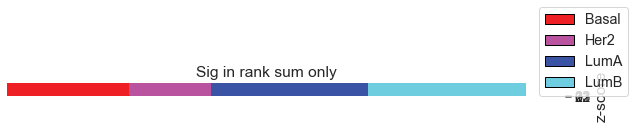

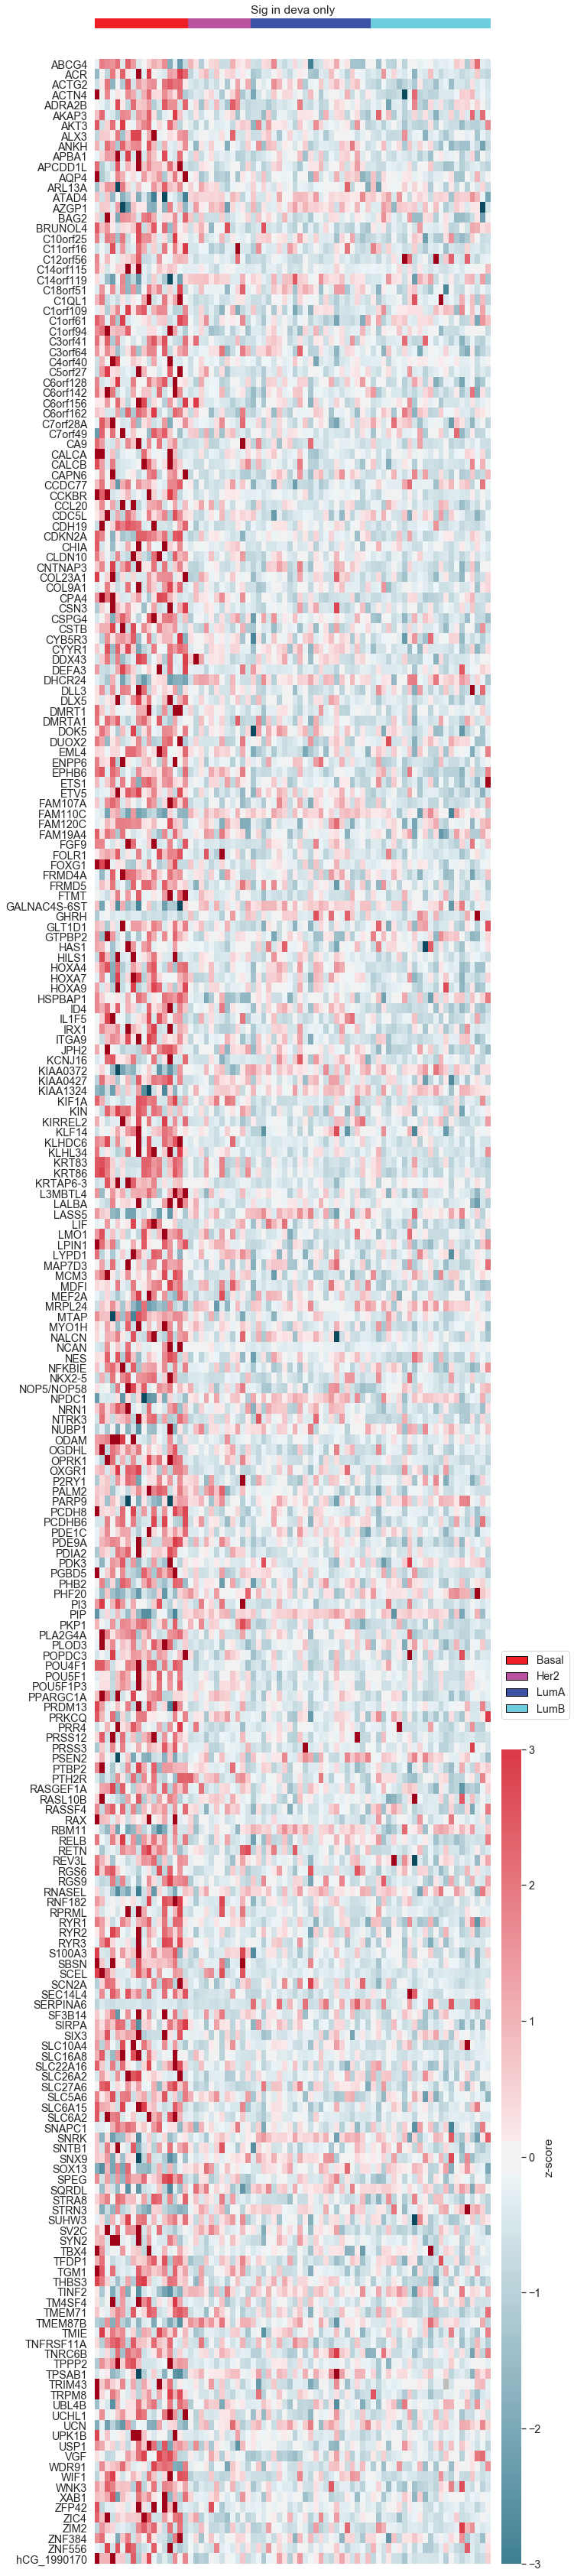

In [108]:
header = deva.read_in_values('brca/annotations_common_samples.csv').sort_values('PAM50')

labs = ['Sig in rank sum only', 'Sig in deva only']
for i, sig_genes in enumerate([ranksigonly, outliersigonly]):
    fig = plt.figure(figsize=(10, 0.25*(1+len(sig_genes))))
    gs = plt.GridSpec(nrows=4, ncols=2, height_ratios=[1] +3*[len(sig_genes)/3], width_ratios=[20, 1], hspace=0.05, wspace=0.05)

    annotax = plt.subplot(gs[0, 0])
    heatax = plt.subplot(gs[1:, 0])
    cbarax = plt.subplot(gs[-1, 1])
    leg_ax = plt.subplot(gs[-2, 1])
    leg_ax.axis('off')

    deva.catheat.heatmap(header[['PAM50']].transpose(), 
                         ax=annotax, cmap=colors, 
                         leg_ax=leg_ax, 
                         leg_kws=dict(loc=(0, 0)), 
                         xticklabels=False)
    annotax.set_yticklabels(['PAM50'], rotation=0)
    annotax.set_title(labs[i])
    
    temp = values.loc[sig_genes, header.index]
    mean = temp.mean(axis=1)
    stdev = temp.std(axis=1)
    temp = temp.subtract(mean, axis=0).divide(stdev, axis=0)
    sns.heatmap(temp, 
                ax=heatax, cbar_ax=cbarax, cmap=cmap,
                xticklabels=False, 
                yticklabels=sig_genes,
                vmin=-3, vmax=3,
                cbar_kws=dict(label='z-score')
               )
#     plt.savefig('output/heatmap_rna_her2_%s.pdf' % "".join(labs[i].split()), bbox_inches='tight', dpi=500)